In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set random seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Step 1: Load and preprocess the data
data = pd.read_excel('IND.xlsx')
time_series = data[['year', 'debt']].set_index('year')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Increase sequence length to capture more historical context
seq_length = 10  # Experiment with different values
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 2: Build an improved LSTM model
model = Sequential()

# First LSTM layer with more units and return sequences
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2, seed=seed))  # Dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2, seed=seed))  # Dropout to prevent overfitting

# Dense layer for output
model.add(Dense(1))

# Compile the model with RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001)  # RMSprop with a lower learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Step 3: Train the model with more epochs
history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_data=(X_test, y_test))


# Step 4: Make predictions for both training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

y_train_actual = scaler.inverse_transform(y_train)
y_test_actual = scaler.inverse_transform(y_test)

# Step 5: Evaluate the model on training data
# Calculate MAE, MSE, RMSE, and MAPE for training data
train_mae = mean_absolute_error(y_train_actual, train_predictions)
train_mse = mean_squared_error(y_train_actual, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mape = np.mean(np.abs((y_train_actual - train_predictions) / y_train_actual)) * 100

# Step 6: Evaluate the model on testing data
# Calculate MAE, MSE, RMSE, and MAPE for testing data
test_mae = mean_absolute_error(y_test_actual, test_predictions)
test_mse = mean_squared_error(y_test_actual, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test_actual - test_predictions) / y_test_actual)) * 100

# Print evaluation metrics for training data
print("Training Data Evaluation:")
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape:.2f}%')

# Print evaluation metrics for testing data
print("\nTesting Data Evaluation:")
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape:.2f}%')

Epoch 1/500


c:\Users\dhevi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.0711 - val_loss: 0.3800
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0335 - val_loss: 0.2611
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0247 - val_loss: 0.1884
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0214 - val_loss: 0.1389
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0183 - val_loss: 0.0811
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0149 - val_loss: 0.0439
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - val_loss: 0.0173
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0106 - val_loss: 0.0050
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0076 - val_loss: 0.0107
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046 - val_loss: 0.0272
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043 - val_loss: 0.0402
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050 - val_loss: 0.0298


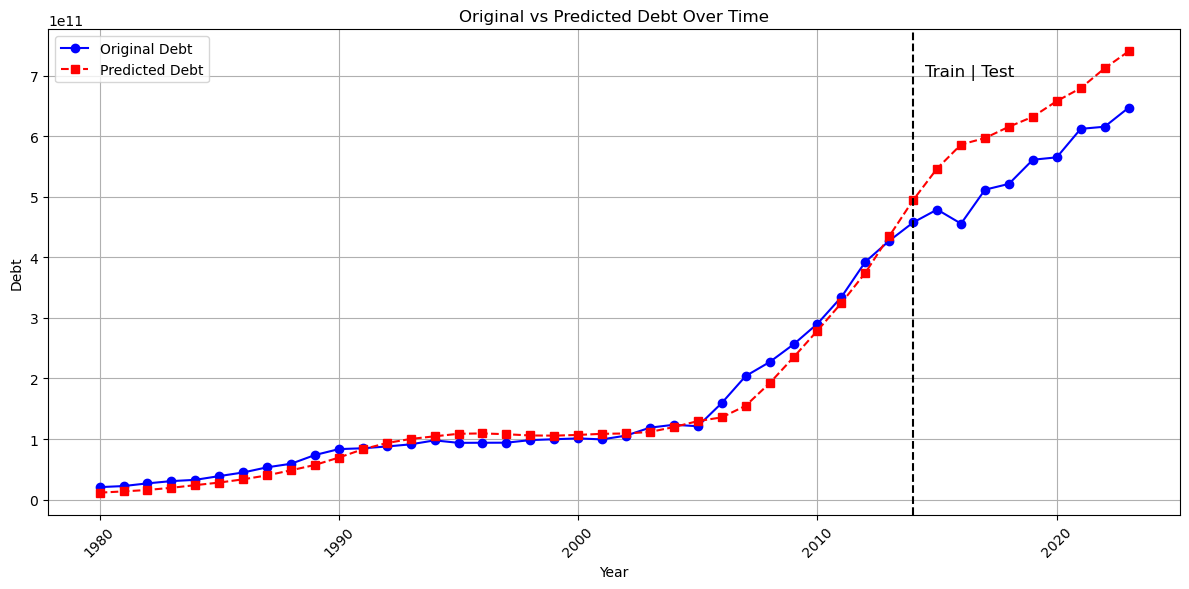

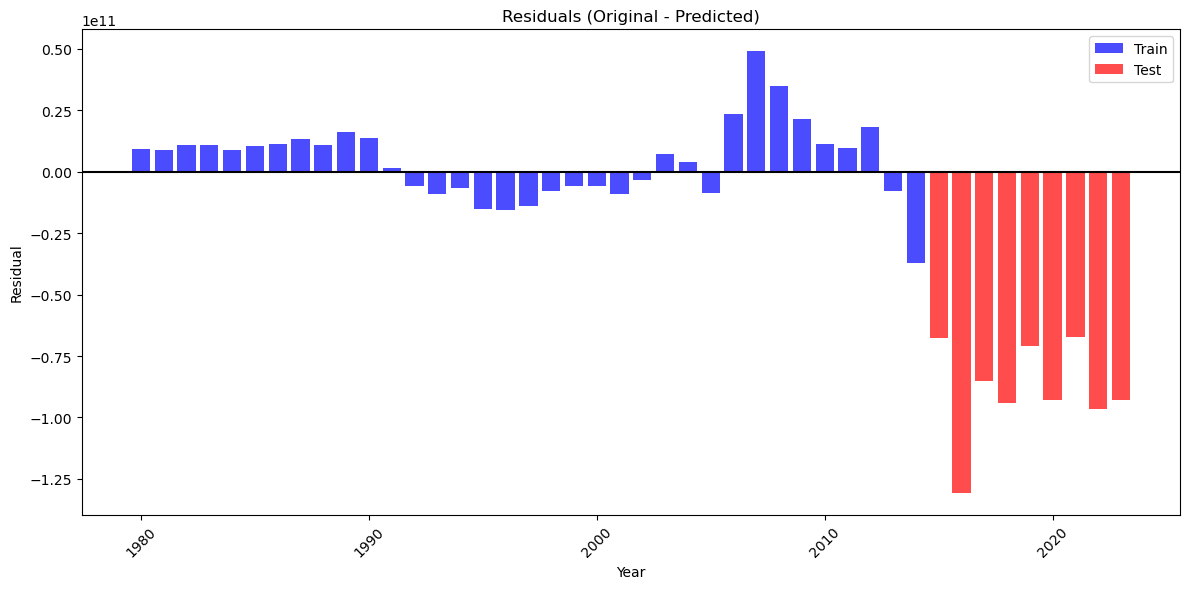

In [ ]:
# Get the years directly from your original data
years = data['year'].values  # Assuming 'year' is a column in your dataframe
# If year is actually your index:
# years = data.index.values

# Calculate what years correspond to our predictions
seq_length = 10  # Same as in your model

# For train predictions, we need years that correspond to the target values
train_years = years[seq_length:train_size+seq_length]
test_years = years[train_size+seq_length:]

# Flatten arrays to ensure consistency
train_predictions_flat = train_predictions.flatten()
y_train_actual_flat = y_train_actual.flatten()
test_predictions_flat = test_predictions.flatten()
y_test_actual_flat = y_test_actual.flatten()

# Plot actual vs predicted using the extracted years - with only 2 colors
plt.figure(figsize=(12, 6))

# Combine train and test data for consistent coloring
all_years = np.concatenate([train_years, test_years])
all_actual = np.concatenate([y_train_actual_flat, y_test_actual_flat])
all_predicted = np.concatenate([train_predictions_flat, test_predictions_flat])

# Plot with only two colors - blue for actual, red for predicted
plt.plot(all_years, all_actual, 'o-', color='blue', label='Original Debt')
plt.plot(all_years, all_predicted, 's--', color='red', label='Predicted Debt')

# Add vertical line at the train-test split point
split_year = train_years[-1]
plt.axvline(x=split_year, color='black', linestyle='--', linewidth=1.5)
plt.text(split_year + 0.5, plt.ylim()[1]*0.9, 'Train | Test', fontsize=12)

# Format plot
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Debt')
plt.title('Original vs Predicted Debt Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('debt_prediction.png', dpi=300)
plt.show()

# Calculate residuals
train_residuals = y_train_actual_flat - train_predictions_flat
test_residuals = y_test_actual_flat - test_predictions_flat

# Plot residuals
plt.figure(figsize=(12, 6))
plt.bar(train_years, train_residuals, color='blue', alpha=0.7, label='Train')
plt.bar(test_years, test_residuals, color='red', alpha=0.7, label='Test')
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Residuals (Original - Predicted)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('debt_residuals.png', dpi=300)
plt.show()

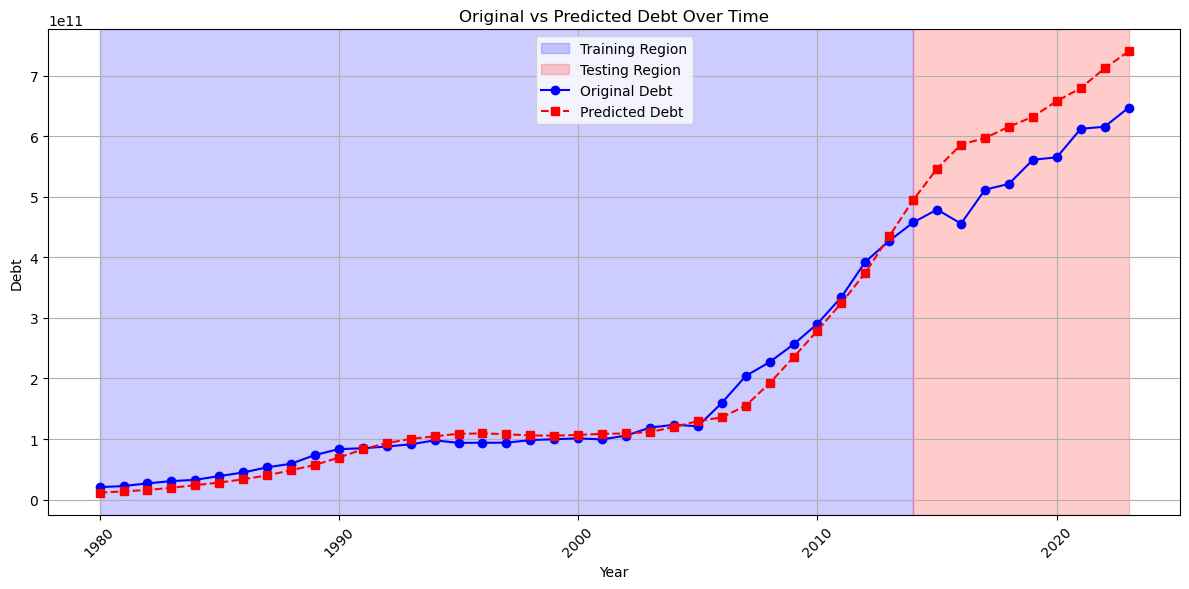

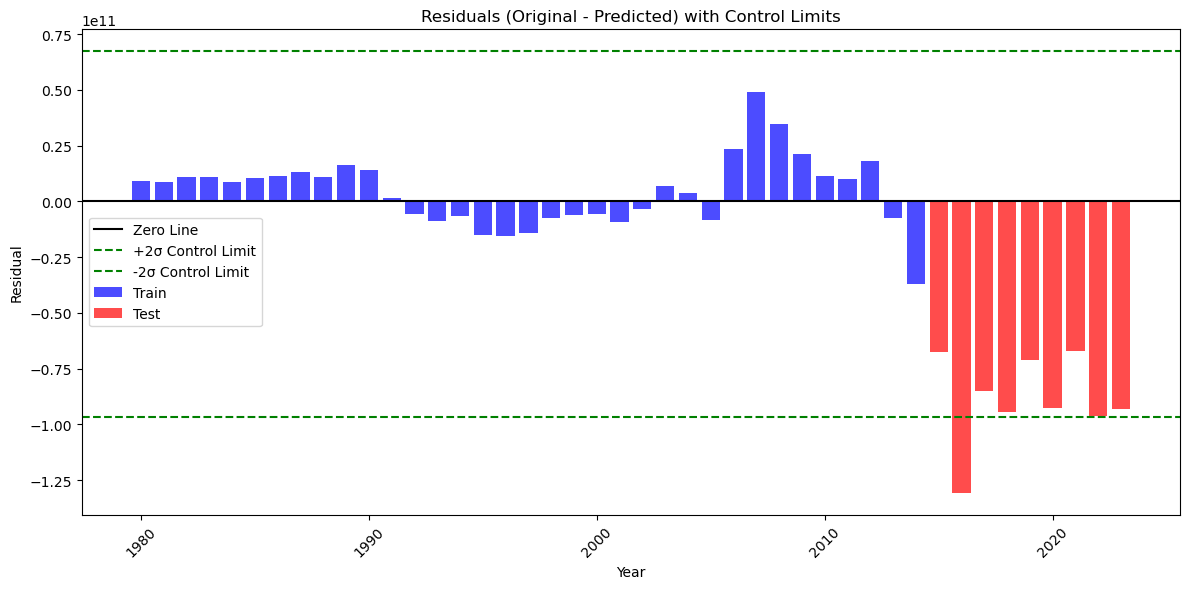

In [14]:
# Get the years directly from your original data
years = data['year'].values  # Assuming 'year' is a column in your dataframe
# If year is actually your index:
# years = data.index.values

# Calculate what years correspond to our predictions
seq_length = 10  # Same as in your model
# For train predictions, we need years that correspond to the target values
train_years = years[seq_length:train_size+seq_length]
test_years = years[train_size+seq_length:]

# Flatten arrays to ensure consistency
train_predictions_flat = train_predictions.flatten()
y_train_actual_flat = y_train_actual.flatten()
test_predictions_flat = test_predictions.flatten()
y_test_actual_flat = y_test_actual.flatten()

# Plot actual vs predicted using the extracted years - with only 2 colors
plt.figure(figsize=(12, 6))

# Combine train and test data for consistent coloring
all_years = np.concatenate([train_years, test_years])
all_actual = np.concatenate([y_train_actual_flat, y_test_actual_flat])
all_predicted = np.concatenate([train_predictions_flat, test_predictions_flat])

# Shade the training and testing regions
split_year = train_years[-1]
min_y, max_y = min(np.min(all_actual), np.min(all_predicted)) * 0.9, max(np.max(all_actual), np.max(all_predicted)) * 1.1
plt.axvspan(min(train_years), split_year, alpha=0.2, color='blue', label='Training Region')
plt.axvspan(split_year, max(test_years), alpha=0.2, color='red', label='Testing Region')

# Plot with only two colors - blue for actual, red for predicted
plt.plot(all_years, all_actual, 'o-', color='blue', label='Original Debt')
plt.plot(all_years, all_predicted, 's--', color='red', label='Predicted Debt')

# Format plot
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Debt')
plt.title('Original vs Predicted Debt Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('debt_prediction.png', dpi=300)
plt.show()

# Calculate residuals
train_residuals = y_train_actual_flat - train_predictions_flat
test_residuals = y_test_actual_flat - test_predictions_flat

# Calculate control limits (±2 standard deviations)
all_residuals = np.concatenate([train_residuals, test_residuals])
std_residuals = np.std(all_residuals)
mean_residuals = np.mean(all_residuals)
upper_control = mean_residuals + 2 * std_residuals
lower_control = mean_residuals - 2 * std_residuals

# Plot residuals
plt.figure(figsize=(12, 6))
plt.bar(train_years, train_residuals, color='blue', alpha=0.7, label='Train')
plt.bar(test_years, test_residuals, color='red', alpha=0.7, label='Test')

# Add control limit lines
plt.axhline(y=0, color='k', linestyle='-', label='Zero Line')
plt.axhline(y=upper_control, color='green', linestyle='--', label='+2σ Control Limit')
plt.axhline(y=lower_control, color='green', linestyle='--', label='-2σ Control Limit')

plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Residuals (Original - Predicted) with Control Limits')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('debt_residuals.png', dpi=300)
plt.show()